In [2]:
import basilpy as bs

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)
#plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)

In [207]:
Non   = 22
Noff  = 50
alpha = 0.2
m1    = bs.OnOffMeasurement( Non, Noff, alpha)

In [208]:
print(m1)

OnOffMeasurement
----------------

  Non                             :  22 
  Noff                            :  50 
  Alpha                           :  0.2 

  Excess                          :  12.0 
  Error Excess                    :  4.898979485566356 
  Li&Ma Significance              :  2.9047925360855653 




In [209]:
%%time
m1.run()

CPU times: user 267 ms, sys: 17.6 ms, total: 285 ms
Wall time: 270 ms


In [210]:
print(m1)

OnOffMeasurement
----------------

  Non                             :  22 
  Noff                            :  50 
  Alpha                           :  0.2 

  Excess                          :  12.0 
  Error Excess                    :  4.898979485566356 
  Li&Ma Significance              :  2.9047925360855653 

  Most probable signal            :  11.90164303092625 
  Expected signal                 :  12.818218456199075 
  Root mean squared               :  3.5802539653213254 



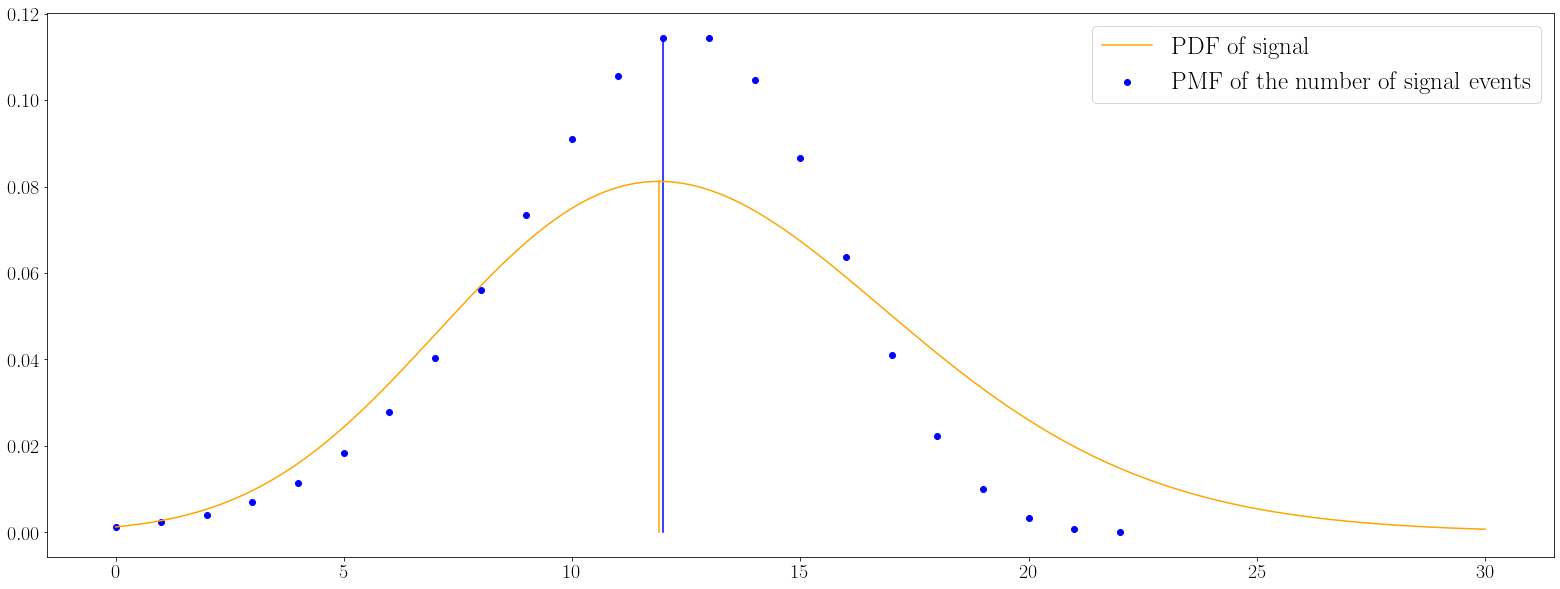

In [211]:
fig, ax = plt.subplots(figsize=(27,10),nrows=1, ncols=1)
# PLOT PMF
ax.scatter( m1.Ns, m1.pmf, label = "PMF of the number of signal events", c="blue")
ax.plot( (m1.mode_pmf,m1.mode_pmf), (0,m1.pmf[m1.Ns==m1.mode_pmf][0]), c="blue")
# PLOT PDF
s = np.linspace(0,30,1000)
ax.plot( s, m1.pdf(s), label = "PDF of signal", c="orange" )
ax.plot( (m1.mode_pdf,m1.mode_pdf), (0,m1.pdf(m1.mode_pdf)), c="orange")

ax.legend()

In [212]:
%%time
UL = m1.upper_limit( 0.95 )
UL

CPU times: user 36.7 ms, sys: 982 µs, total: 37.7 ms
Wall time: 37 ms


21.510562474446274

In [213]:
%%time
CI_low, CI_up = m1.credible_interval()
CI_low, CI_up 

CPU times: user 3.36 s, sys: 11 ms, total: 3.37 s
Wall time: 3.37 s


(7.2588843228967, 17.100166862070044)

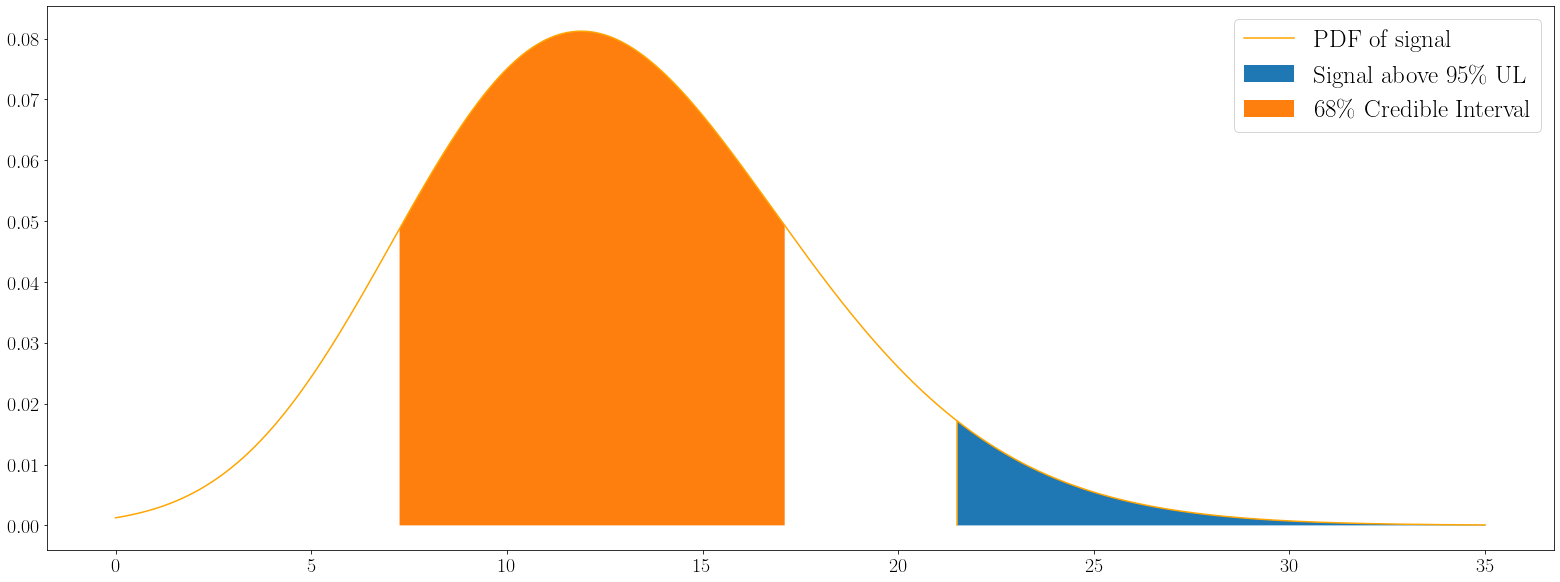

In [214]:
fig, ax = plt.subplots(figsize=(27,10),nrows=1, ncols=1)
# PLOT PDF
s = np.linspace(0,35,1000)
ax.plot( s, m1.pdf(s), label = "PDF of signal", c="orange" )
ax.plot( (UL,UL), (0,m1.pdf(UL)), c="orange")
#SHOW UL
x = np.linspace(UL,35,1000)
y = m1.pdf(x)
ax.fill_between(x,y, label="Signal above 95\% UL")
#SHOW CI
x = np.linspace(CI_low,CI_up,1000)
y = m1.pdf(x)
ax.fill_between(x,y, label="68\% Credible Interval")

ax.legend()

In [215]:
a          = 0.2
normfact   = a**2+a
signal_pdf = lambda x: 1/(a+x)**2 * normfact
bkg_pdf    = lambda x: np.ones_like(x)

In [216]:
# Generate the observed x accoridng to the bkg hypothesis
observed_x = np.random.uniform(0,1,Non)
# Generate the observed x accoridng to the bkg hypothesis
signal_invcdf = lambda u: a**2*u/( normfact- a*u)
observed_x = signal_invcdf( np.random.uniform(0,1,Non) )

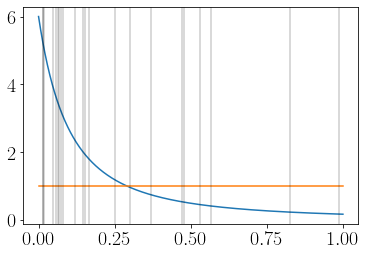

In [217]:
x = np.linspace(0,1,1000)
plt.plot(x, signal_pdf(x))
plt.plot(x, bkg_pdf(x))
for ix in observed_x:
    plt.axvline( ix, 0, 1, c="black", alpha=0.2)

In [218]:
Non   = 22
Noff  = 30
alpha = 0.2
bkg_likelihoods    = bkg_pdf(observed_x)
signal_likelihoods = signal_pdf(observed_x)
m2    = bs.OnOffMeasurement( Non, Noff, alpha,
                           bkg_likelihoods    = bkg_likelihoods,
                           signal_likelihoods = signal_likelihoods)
print(m2)

OnOffMeasurement
----------------

  Non                             :  22 
  Noff                            :  30 
  Alpha                           :  0.2 

  Excess                          :  16.0 
  Error Excess                    :  4.8166378315169185 
  Li&Ma Significance              :  4.350295871397536 




In [219]:
%%time
m2.run()

CPU times: user 221 ms, sys: 5.79 ms, total: 227 ms
Wall time: 228 ms


In [220]:
print(m2)

OnOffMeasurement
----------------

  Non                             :  22 
  Noff                            :  30 
  Alpha                           :  0.2 

  Excess                          :  16.0 
  Error Excess                    :  4.8166378315169185 
  Li&Ma Significance              :  4.350295871397536 

  Most probable signal            :  16.812872905390584 
  Expected signal                 :  17.836637389544176 
  Root mean squared               :  4.223344337079819 



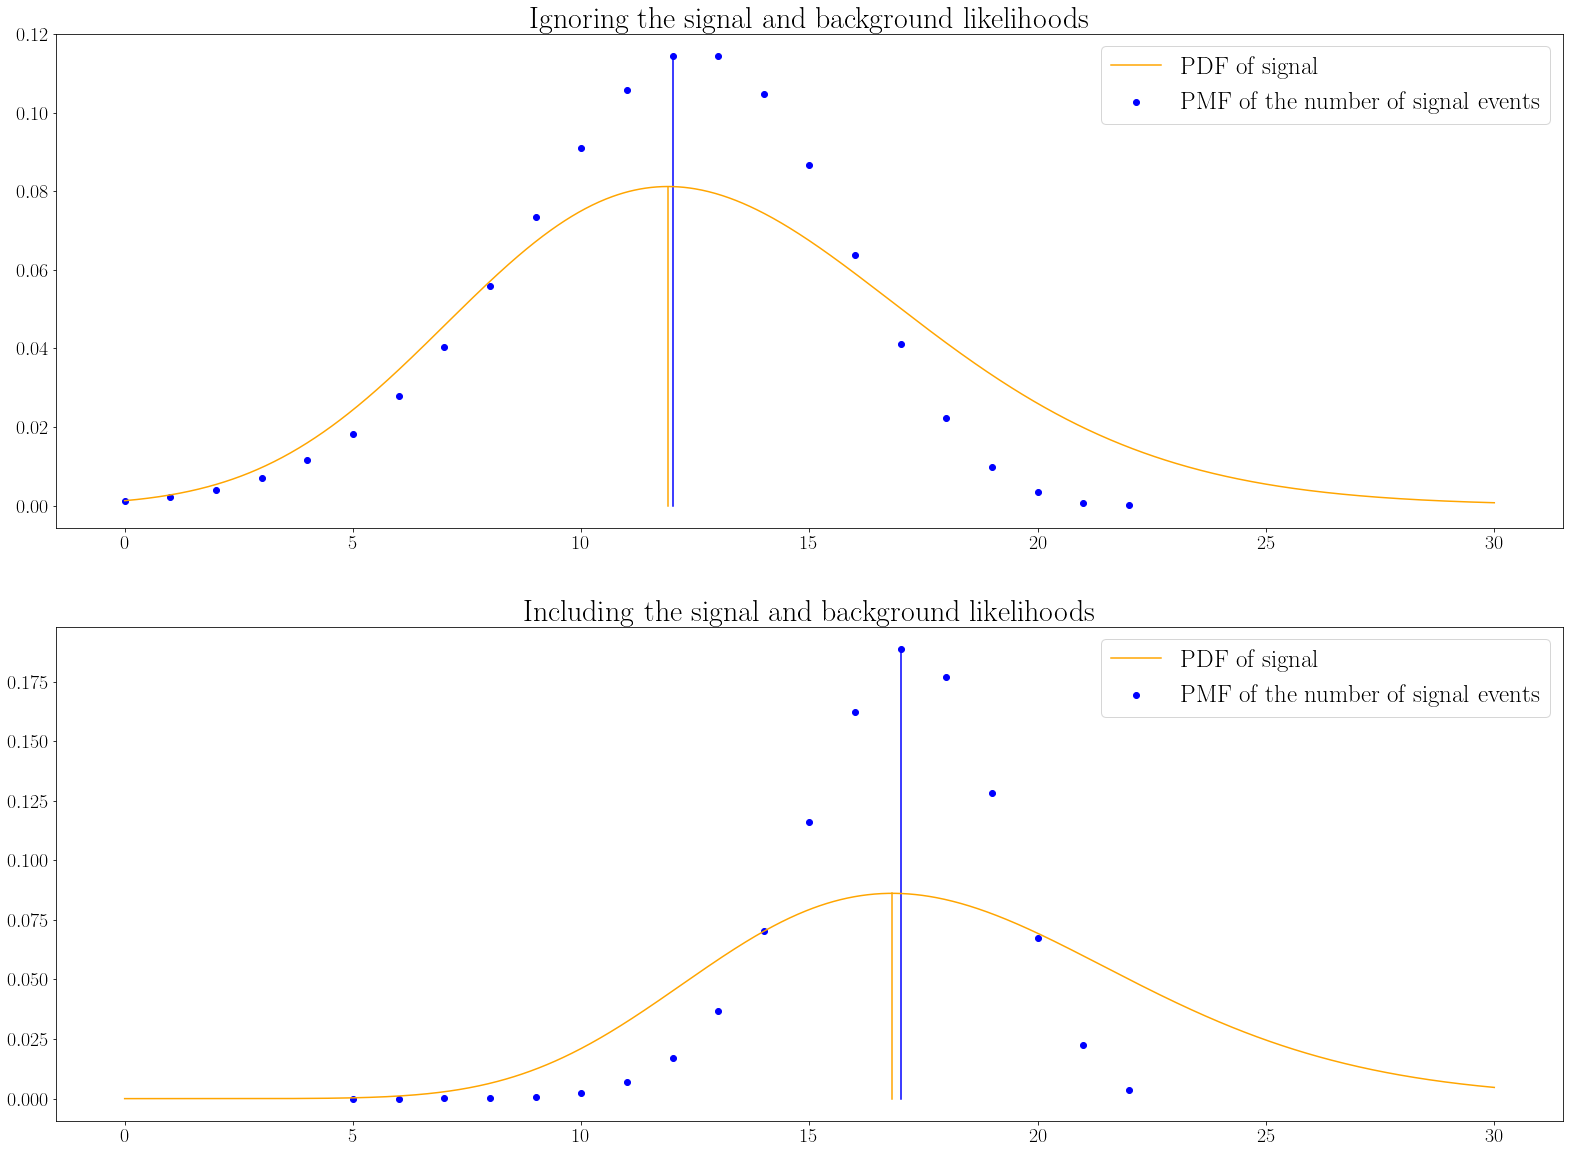

In [222]:
fig, axs = plt.subplots(figsize=(27,20),nrows=2, ncols=1)

ax_ind = 0
# PLOT PMF
axs[ax_ind].scatter( m1.Ns, m1.pmf, label = "PMF of the number of signal events", c="blue")
axs[ax_ind].plot( (m1.mode_pmf,m1.mode_pmf), (0,m1.pmf[m1.Ns==m1.mode_pmf][0]), c="blue")
# PLOT PDF
s = np.linspace(0,30,1000)
axs[ax_ind].plot( s, m1.pdf(s), label = "PDF of signal", c="orange" )
axs[ax_ind].plot( (m1.mode_pdf,m1.mode_pdf), (0,m1.pdf(m1.mode_pdf)), c="orange")
axs[ax_ind].set_title("Ignoring the signal and background likelihoods")
axs[ax_ind].legend()

ax_ind = 1
# PLOT PMF
axs[ax_ind].scatter( m2.Ns, m2.pmf, label = "PMF of the number of signal events", c="blue")
axs[ax_ind].plot( (m2.mode_pmf,m2.mode_pmf), (0,m2.pmf[m2.Ns==m2.mode_pmf][0]), c="blue")
# PLOT PDF
s = np.linspace(0,30,1000)
axs[ax_ind].plot( s, m2.pdf(s), label = "PDF of signal", c="orange" )
axs[ax_ind].plot( (m2.mode_pdf,m2.mode_pdf), (0,m2.pdf(m2.mode_pdf)), c="orange")
axs[ax_ind].set_title("Including the signal and background likelihoods")
axs[ax_ind].legend()